In [2]:
import os
import cv2
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from skimage.util import random_noise
from PIL import Image
from albumentations import Compose, HorizontalFlip, Rotate, GaussianBlur, RandomBrightnessContrast, GaussNoise
from albumentations.core.composition import OneOf

In [6]:
dataset_path = 'C:/Users/Lenovo/capstone/split_dataset'
files = os.listdir(dataset_path)

In [42]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [44]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [46]:
# dataset_path = '/content/drive/MyDrive/dataset'

In [48]:
# def delete_augmented_images(input_dir, prefix="aug"):
#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         if os.path.isdir(class_path):
#             for file_name in os.listdir(class_path):
#                 if file_name.startswith(prefix):
#                     file_path = os.path.join(class_path, file_name)
#                     try:
#                         os.remove(file_path)
#                         print(f"Deleted augmented image: {file_path}")
#                     except Exception as e:
#                         print(f"Error deleting file {file_path}: {e}")

In [50]:
# delete_augmented_images(dataset_path)

In [52]:
# def apply_motion_blur(image, kernel_size=5):
#     kernel = np.zeros((kernel_size, kernel_size))
#     kernel[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)
#     kernel = kernel / kernel_size
#     return cv2.filter2D(image, -1, kernel)

# def add_gaussian_noise(image):
#     mean = 0
#     variance = 0.001
#     stddev = np.sqrt(variance)

#     # Menghasilkan Gaussian noise
#     gaussian_noise = np.random.normal(mean, stddev, image.shape).astype(np.float32)

#     # Menambahkan noise pada gambar asli
#     noisy_image = image.astype(np.float32) / 255.0 + gaussian_noise
#     noisy_image = np.clip(noisy_image, 0, 1.0)  # Rentang nilai 0-1
#     noisy_image = (noisy_image * 255).astype(np.uint8)  # Konversi ke rentang 0-255 dan tipe uint8

#     return noisy_image


In [54]:
# def augment_images(input_dir, min_images=600, target_size=(224, 224)):
#     datagen = keras.preprocessing.image.ImageDataGenerator(
#         rotation_range=10,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
#     )

#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         if os.path.isdir(class_path):
#             images = os.listdir(class_path)
#             num_images = len(images)
#             if num_images < min_images:
#                 num_to_generate = min_images - num_images
#                 print(f"Augmenting {num_to_generate} images for class {class_name}")

#                 for i in range(num_to_generate):
#                     img_name = images[i % num_images]
#                     img_path = os.path.join(class_path, img_name)
#                     try:
#                         img = cv2.imread(img_path)
#                         if img is None:
#                             print(f"Failed to load image: {img_path}")
#                             continue

#                         img = cv2.resize(img, target_size)

#                         # Efek augmentasi tambahan secara acak
#                         if random.choice([True, False]):
#                             img = apply_motion_blur(img)
#                         if random.choice([True, False]):
#                             img = add_gaussian_noise(img)

#                         x = keras.preprocessing.image.img_to_array(img)
#                         x = x.reshape((1,) + x.shape)

#                         for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpg'):
#                             break
#                     except Exception as e:
#                         print(f"Error augmenting image {img_path}: {e}")



In [ ]:
# augment_images(dataset_path)

Augmenting 315 images for class durga
Augmenting 450 images for class gupolo
Augmenting 244 images for class nandhi
Augmenting 196 images for class surya
Augmenting 191 images for class candra


In [ ]:
# def resize_images(input_dir, output_dir, target_size=(224, 224)):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         output_class_path = os.path.join(output_dir, class_name)
#         if not os.path.exists(output_class_path):
#             os.makedirs(output_class_path)

#         if os.path.isdir(class_path):
#             for img_name in os.listdir(class_path):
#                 img_path = os.path.join(class_path, img_name)
#                 try:
#                     with Image.open(img_path) as img:
#                         img_resized = img.resize(target_size)
#                         img_resized.save(os.path.join(output_class_path, img_name))
#                 except Exception as e:
#                     print(f"Error resizing image {img_path}: {e}")

In [ ]:
# resized_dataset_path = '/content/drive/MyDrive/resized_dataset'

In [ ]:
# resize_images(dataset_path, resized_dataset_path)

In [ ]:
# def split_dataset(input_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for class_name in os.listdir(input_dir):
#         class_path = os.path.join(input_dir, class_name)
#         if os.path.isdir(class_path):
#             images = os.listdir(class_path)
#             train, temp = train_test_split(images, train_size=train_ratio, random_state=42)
#             val, test = train_test_split(temp, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

#             for split_name, split_data in zip(['train', 'val', 'test'], [train, val, test]):
#                 split_path = os.path.join(output_dir, split_name, class_name)
#                 if not os.path.exists(split_path):
#                     os.makedirs(split_path)
#                 for img_name in split_data:
#                     shutil.copy(os.path.join(class_path, img_name), os.path.join(split_path, img_name))

# split_dataset(resized_dataset_path, '/content/drive/MyDrive/split_dataset')

In [8]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
val_test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    'C:/Users/Lenovo/capstone/split_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    'C:/Users/Lenovo/capstone/split_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'C:/Users/Lenovo/capstone/split_dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 4793 images belonging to 10 classes.
Found 1027 images belonging to 10 classes.
Found 1031 images belonging to 10 classes.


In [12]:
from collections import Counter
train_labels = train_generator.classes
print("Distribusi awal:", Counter(train_labels))

Distribusi awal: Counter({9: 730, 7: 658, 4: 464, 1: 439, 0: 427, 8: 420, 6: 417, 2: 415, 5: 414, 3: 409})


In [20]:
# Definisi model dengan perbaikan
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),

    # Block 1
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Block 2
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Block 3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Block 4
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Global Average Pooling
    tf.keras.layers.GlobalAveragePooling2D(),

    # Fully Connected Layer dengan Dropout
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model dengan optimizer dan callback
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
# Inisialisasi callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Metode pemantauan (contohnya val_loss atau val_accuracy)
    patience=3,           # Jumlah epoch tanpa peningkatan sebelum menghentikan pelatihan
    restore_best_weights=True  # Mengembalikan bobot terbaik setelah pelatihan selesai
)

In [24]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 513ms/step - accuracy: 0.1852 - loss: 2.4507 - val_accuracy: 0.0886 - val_loss: 2.5586
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 346ms/step - accuracy: 0.4626 - loss: 1.7206 - val_accuracy: 0.1003 - val_loss: 2.5631
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 320ms/step - accuracy: 0.5665 - loss: 1.4877 - val_accuracy: 0.3262 - val_loss: 2.0702
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 318ms/step - accuracy: 0.6356 - loss: 1.2859 - val_accuracy: 0.6680 - val_loss: 1.3075
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 317ms/step - accuracy: 0.7000 - loss: 1.1492 - val_accuracy: 0.7770 - val_loss: 1.0070
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 309ms/step - accuracy: 0.7122 - loss: 1.0869 - val_accuracy: 0.8140 - val_loss: 0.8711
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 62s 416ms/step - accuracy: 0.7371 - loss: 1.0014 - val_accuracy: 0.8023 - val_loss: 0.8054
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 58s 385ms/step - accuracy: 0.7649 - loss: 0

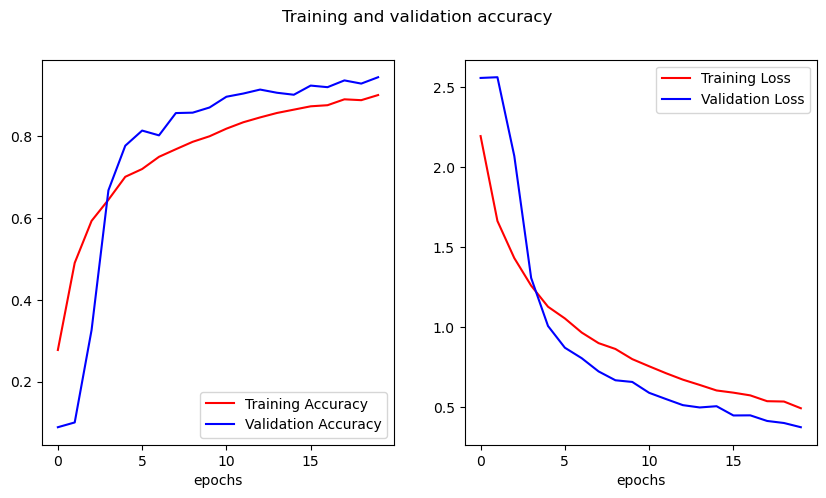

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [28]:
import keras

In [30]:
model.save('C:/Users/Lenovo/capstone/ArteFacto_model.keras')

In [32]:
# Load the model
model = tf.keras.models.load_model("C:/Users/Lenovo/capstone/ArteFacto_model.keras")

# Re-compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Save the model again
model.save("C:/Users/Lenovo/capstone/ArteFacto_model_compiled.keras")